# Capstone Project AQI to the Death (Sprint 3)
#### Nattawaree Piyarat

## Problem statement
Can machine learning accurately indicate heathly based on the Air Quality Index (AQI)?
Are there correlations between air quality and health outcomes, particularly mortality rates, and air pollution stems from various sources such as wildfires, dust, vehicular emissions, and industrial activities?

#### Goal for Sprint 3
- Visualization
- EDA insight
- Model optimization, evaluation, and interpretation.



## Dataset
1. Air Quality Index (2009–2019): (Due to 2020-2021 was COVID-19 pandamics make as outliner)

- Initially sourced from WHO.
- This dataset has been removed and replaced with another due to the inclusion of more pollutants, while retaining similar details.
2. Number of Deaths by Cause (2016–2019):

- Sourced from WHO.
3. Air Quality Open Data Platform (2019–2020):

- Sourced from The World Air Quality Index Project.
- The data includes city-specific measurements, aggregated to calculate the mean air quality for each country on each date for this project.



### Steps
### Step 1. Exploratory Data Analysis
Describe and pre-processing data
- Shape
- Fill N/A data
- Remove duplicate rows
- Convert data and add necessary aggregate columns

### Step 2. Modelling
For this project I choose 4 models
1. Linear Regression
2. Logistic Regression
3. KNN
4. Decision Tree

### Step 3. Model Comparison


---

## Step 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## TODO - DTALE - DATA Visulization library

from scipy import stats
from scipy.stats import norm #used for plotting

In [2]:
# Read data of "Air quality open data platform year 2019 - 2023 from The World Air Quality Index Project"
df = pd.read_csv('Data/2016_3aqi.csv')

In [3]:
df.head()

Date   Country iso3         aqi         co        no2         o3  \
0  2015-12-28     China  CHN  153.333333  13.276923  20.359615  12.394118   
1  2015-12-28     India  IND         NaN  17.800000  10.450000  20.366667   
2  2015-12-28  Thailand  THA         NaN   9.420000  12.280000  18.400000   
3  2015-12-29     China  CHN  273.666667  15.434615  24.209615  11.611765   
4  2015-12-29     India  IND         NaN   7.840000  12.525000  14.233333   

         pm10        pm25        so2  
0   77.365385  139.173077  16.957692  
1  127.000000  190.000000   5.500000  
2   47.200000         NaN   6.900000  
3   95.192308  168.192308  18.317308  
4  127.000000  201.875000   5.560000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3675 non-null   object 
 1   Country  3675 non-null   object 
 2   iso3     3675 non-null   object 
 3   aqi      925 non-null    float64
 4   co       3675 non-null   float64
 5   no2      3675 non-null   float64
 6   o3       3674 non-null   float64
 7   pm10     3674 non-null   float64
 8   pm25     3667 non-null   float64
 9   so2      3674 non-null   float64
dtypes: float64(7), object(3)
memory usage: 287.2+ KB


In [5]:
df.describe()

aqi           co          no2           o3         pm10  \
count  925.000000  3675.000000  3675.000000  3674.000000  3674.000000   
mean    90.437387     5.379977    11.245260    16.940225    57.127570   
std     50.788645     3.736787     5.316479     9.380021    27.125544   
min      0.000000     0.100000     2.400000     3.600000    13.800000   
25%     60.000000     0.100000     7.166667     9.910132    37.250000   
50%     83.333333     6.178846    10.355769    13.924747    51.990385   
75%    111.750000     7.845192    14.457143    22.997826    72.102564   
max    351.500000    21.486538    48.222222    56.012500   216.142857   

              pm25          so2  
count  3667.000000  3674.000000  
mean    101.422452     4.462196  
std      39.955062     3.682360  
min      22.000000     0.633333  
25%      70.583194     1.540714  
50%      97.961538     4.015192  
75%     128.776961     5.797596  
max     245.300000   125.950000

### Data
1. Shape is 3675 x 10
2. All columns show mean and max so far which mean there are some outliers.
3. Some null value
    - Fill aqi by 0 (not use)
    - Fill other values by mean of each country

In [6]:
# check null value percentage
df.isna().mean()*100

Date        0.000000
Country     0.000000
iso3        0.000000
aqi        74.829932
co          0.000000
no2         0.000000
o3          0.027211
pm10        0.027211
pm25        0.217687
so2         0.027211
dtype: float64

In [7]:
# Fill aqi by 0 (not use)
# Fill other values by mean of each country

df[['aqi']] = df[['aqi']].fillna(value=0)
df['o3'] = df['o3'].fillna(df.groupby('Country')['o3'].transform('mean'))
df['pm10'] = df['pm10'].fillna(df.groupby('Country')['pm10'].transform('mean'))
df['pm25'] = df['pm25'].fillna(df.groupby('Country')['pm25'].transform('mean'))
df['so2'] = df['so2'].fillna(df.groupby('Country')['so2'].transform('mean'))


In [8]:
# check null value percentage
df.isna().mean()*100

Date       0.0
Country    0.0
iso3       0.0
aqi        0.0
co         0.0
no2        0.0
o3         0.0
pm10       0.0
pm25       0.0
so2        0.0
dtype: float64

In [9]:
# remove duplicate
df = df.drop_duplicates()

In [10]:
df.duplicated().mean()*100

0.0

In [11]:
# Change date datatype from object to date
df.Date = pd.to_datetime(df.Date)

In [12]:
df['year'] = df['Date'].dt.year

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3649 entries, 0 to 3674
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3649 non-null   datetime64[ns]
 1   Country  3649 non-null   object        
 2   iso3     3649 non-null   object        
 3   aqi      3649 non-null   float64       
 4   co       3649 non-null   float64       
 5   no2      3649 non-null   float64       
 6   o3       3649 non-null   float64       
 7   pm10     3649 non-null   float64       
 8   pm25     3649 non-null   float64       
 9   so2      3649 non-null   float64       
 10  year     3649 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(2)
memory usage: 327.8+ KB


### Visualize data

<Figure size 640x480 with 0 Axes>

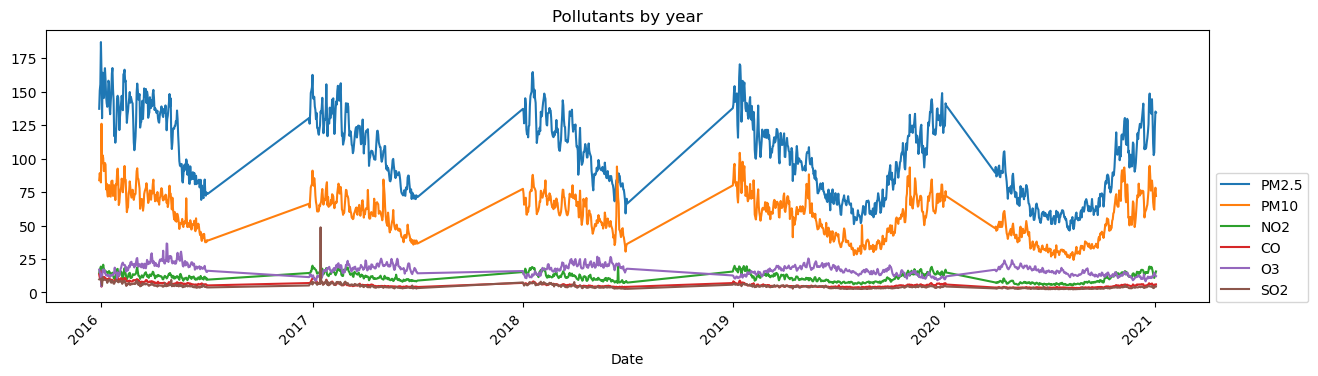

In [14]:
plt.figure()
plt.subplots(figsize=(15, 4))
df.groupby(df.Date)['pm25'].mean().plot(kind='line',label='PM2.5')
df.groupby(df.Date)['pm10'].mean().plot(kind='line', label='PM10')
df.groupby(df.Date)['no2'].mean().plot(kind='line', label='NO2')
df.groupby(df.Date)['co'].mean().plot(kind='line', label='CO')
df.groupby(df.Date)['o3'].mean().plot(kind='line', label='O3')
df.groupby(df.Date)['so2'].mean().plot(kind='line', label='SO2')
plt.legend(loc="upper left",bbox_to_anchor=(1, 0.5))
plt.title('Pollutants by year')
plt.xticks(rotation=45)
plt.show()

>**Finding**
From 2016 to 2018, data is available only for the first half of each year, showing a peak in January and a subsequent increase through the mid-year. For 2019 to 2021 Q1, the full-year data follows a similar trend: a peak in January, a gradual decline until mid-year, and then a climb back up until the next January peak.

In [15]:
# View same data using plotly

import plotly.express as px

columns =  ['pm25','pm10','o3','no2','so2','co']
fig = px.line(df, x=df.Date, y=columns,)

# axis labels and title
fig.update_layout(
    yaxis_title="Number of Pollutants", 
    xaxis_title="Year", 
    legend_title="", 
    title="Pollutants from 2016 to 2021"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [16]:
# export pictures
# import os

# if not os.path.exists("images"):
#     os.mkdir("images")

In [17]:
# fig.write_image("images/Pollutants from 2016 to 2021.png")

<Figure size 640x480 with 0 Axes>

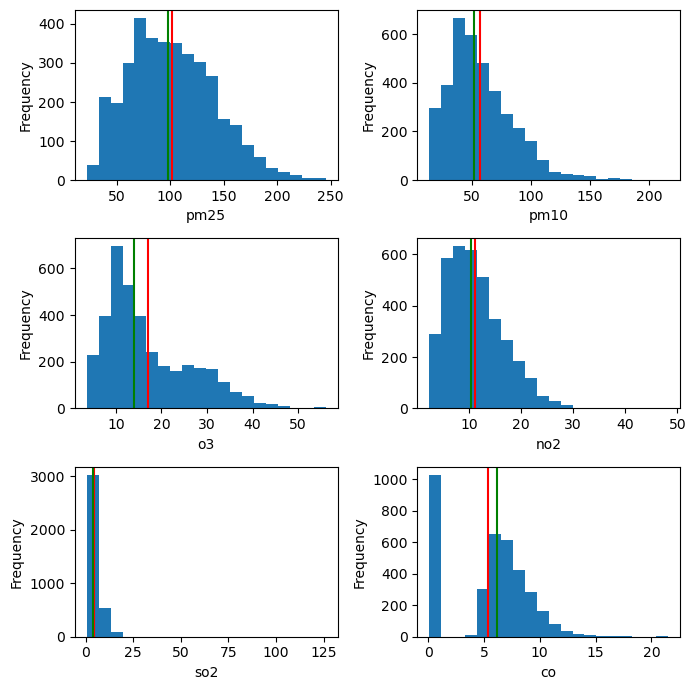

In [18]:
# View distribution of each pollutants

plt.figure()

plt.show()

plt.subplots(3, 2 , figsize=(7,7))
col = ['pm25','pm10','o3','no2','so2','co']
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.hist(df[col[i]].values, bins=20)  # check distribution of single set of data
    plt.axvline(df[col[i]].mean(),c='red',label='mean')
    plt.axvline(df[col[i]].median(),c='g',label='median')
    plt.xlabel(col[i])
    plt.ylabel('Frequency')
#     plt.title('PM2.5 histogram')

plt.tight_layout()
plt.show()

> **Finding**
PM2.5 shows normal distribution, mean and median also almost same.\
PM10, O3, NO2, SO2 show skewed right (the left tail (smaller values) is less than the right tail (larger values))

C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



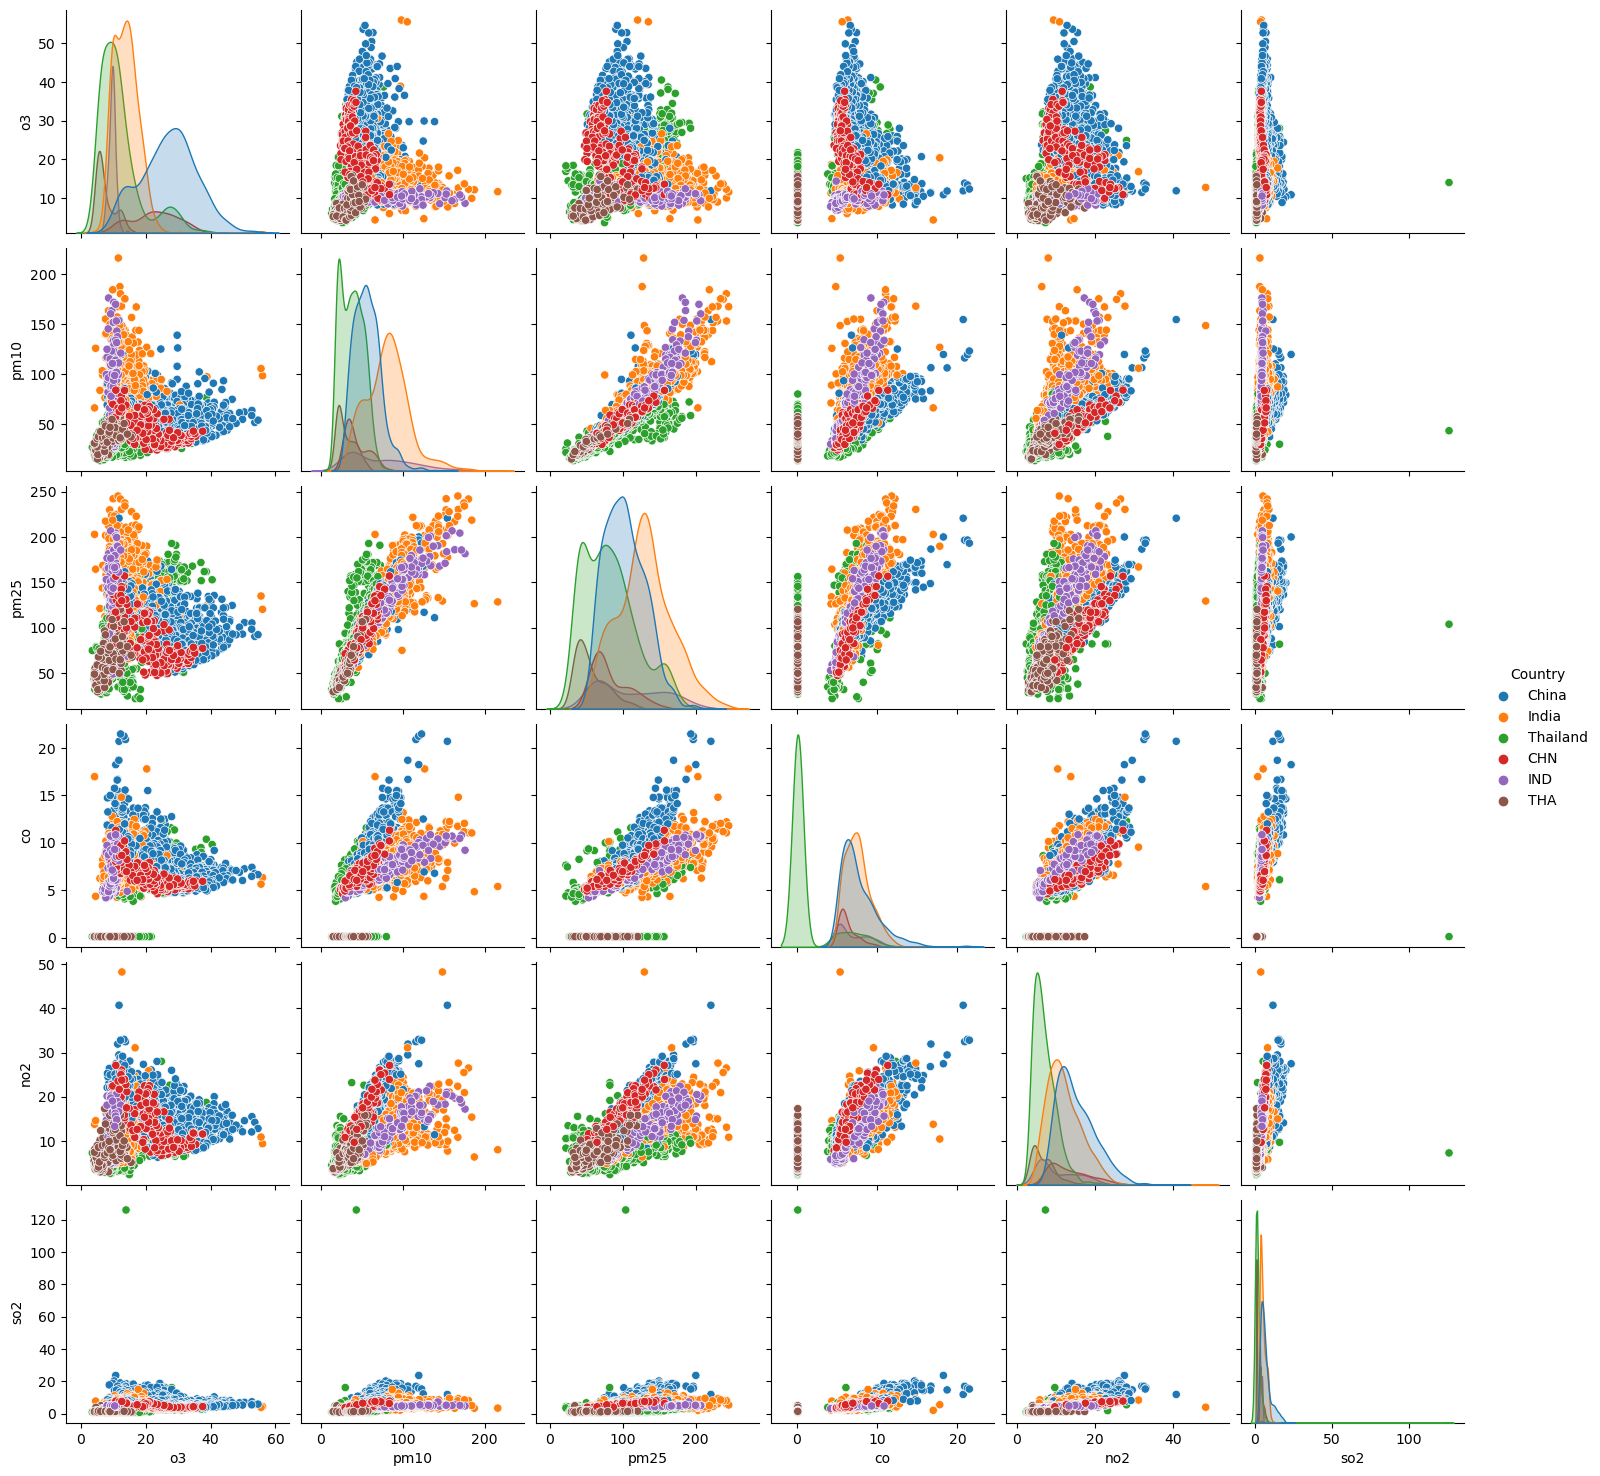

In [19]:
# Check correlations of each pollutants
cols_to_plot = ['Country','o3','pm10','pm25','co','no2','so2']
sns.pairplot(df[cols_to_plot], hue='Country')

> **Finding**
All polutants look like they have linear relationships

### View death data

In [20]:
df_d = pd.read_csv('Data/Merge 2016-2019.csv')

In [21]:
df_d.sample(10)

Code                            Cause     Country iso3  year   Sex  \
185    745                    Kidney cancer  Bangladesh  BGD  2017  BTSX   
3371   812  Sickle cell disorders and trait       China  CHN  2018  BTSX   
2829   150                          Measles    Thailand  THA  2017  BTSX   
2833   410                     Otitis media    Thailand  THA  2017  BTSX   
453   1575    Exposure to mechanical forces  Bangladesh  BGD  2019  BTSX   
2309  1030                         Glaucoma    SriLanka  LKA  2017  BTSX   
3500   250                  Schistosomiasis       China  CHN  2019  BTSX   
1151   230          African trypanosomiasis       India  IND  2016  BTSX   
853   1540                       Poisonings      Bhutan  BTN  2018  BTSX   
589   1241         Gastritis and duodenitis      Bhutan  BTN  2016  BTSX   

     Age Group  Population  Deaths  Death rate      DALY  \
185    ALLAges   160000000  964.14        0.60  29620.13   
3371   ALLAges  1440000000  107.62        0.01  30958.73   
2829   ALLAges    69200000   17.09        0.02   1720.09   
2833   ALLAges    69200000    7.20        0.01  16815.81   
453    ALLAges   163000000  724.59        0.44  86068.90   
2309   ALLAges    21100000    1.58        0.01   3573.73   
3500   ALLAges  1440000000  399.91        0.03  80006.94   
1151   ALLAges  1320000000    0.00        0.00      0.00   
853    ALLAges      754396    1.98        0.26    135.25   
589    ALLAges      736706    1.98        0.27    192.93   

      DALY rate per 100 000 population  
185                              18.51  
3371                              2.15  
2829                              2.49  
2833                             24.30  
453                              52.80  
2309                             16.94  
3500                              5.56  
1151                              0.00  
853                              17.93  
589                              26.19

In [22]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Code                              3551 non-null   int64  
 1   Cause                             3551 non-null   object 
 2   Country                           3551 non-null   object 
 3   iso3                              3551 non-null   object 
 4   year                              3551 non-null   int64  
 5   Sex                               3551 non-null   object 
 6   Age Group                         3551 non-null   object 
 7   Population                        3551 non-null   int64  
 8   Deaths                            3551 non-null   float64
 9   Death rate                        3551 non-null   float64
 10  DALY                              3551 non-null   float64
 11  DALY rate per 100 000 population  3551 non-null   float64
dtypes: flo

In [23]:
df_d.head()

Code                                  Cause     Country iso3  year   Sex  \
0  1140                                 Stroke  Bangladesh  BGD  2016  BTSX   
1  1130                Ischaemic heart disease  Bangladesh  BGD  2016  BTSX   
2    30                           Tuberculosis  Bangladesh  BGD  2016  BTSX   
3   490                    Neonatal conditions  Bangladesh  BGD  2016  BTSX   
4  1180  Chronic obstructive pulmonary disease  Bangladesh  BGD  2016  BTSX   

  Age Group  Population     Deaths  Death rate       DALY  \
0   ALLAges   158000000  120674.90       76.38  2676519.0   
1   ALLAges   158000000   90632.07       57.36  2216751.0   
2   ALLAges   158000000   61224.00       38.75  2971096.0   
3   ALLAges   158000000   52495.41       33.22  5453862.0   
4   ALLAges   158000000   39330.24       24.89  1037541.0   

   DALY rate per 100 000 population  
0                           1694.00  
1                           1403.01  
2                           1880.44  
3                           3451.81  
4                            656.67

In [24]:
# Narrow the data only focus countries
country = ["IND","THA","CHN"]
df_d = df_d[df_d['iso3'].isin(country)]

In [25]:
# Merge to main dataset

df_result = pd.merge( df_d[['Cause','Country','Deaths','Death rate','year','iso3']],df
                     , on=['iso3', 'year'], how='inner')

In [26]:
df_result.sample(10)

Cause Country_x    Deaths  \
128653                               Pancreatitis  Thailand   1068.74   
10636   Cardiomyopathy, myocarditis, endocarditis     India  11513.81   
154744                               Encephalitis  Thailand    691.55   
212443                                   Epilepsy  Thailand    688.76   
282777                          Natural disasters     China    354.36   
20644                      Food-bourne trematodes     India      0.00   
227497                       Macular degeneration  Thailand      0.00   
282101                             Whooping cough     China    507.62   
250845                                 Poisonings     China  26867.80   
253276                     Interpersonal violence     China  12915.88   

        Death rate  year iso3       Date Country_y         aqi        co  \
128653        1.55  2016  THA 2016-01-24  Thailand    0.000000  8.240000   
10636         0.87  2016  IND 2016-05-11     India    0.000000  7.260000   
154744        1.00  2017  THA 2017-02-23  Thailand    0.000000  0.100000   
212443        0.99  2019  THA 2019-12-08  Thailand    0.000000  0.100000   
282777        0.02  2018  CHN 2018-02-03     China   60.500000  7.825000   
20644         0.00  2016  IND 2016-01-17     India    0.000000  7.555556   
227497        0.00  2019  THA 2019-09-04  Thailand    0.000000  0.100000   
282101        0.04  2018  CHN 2018-03-31     China  157.250000  7.888462   
250845        1.88  2017  CHN 2017-05-07     China  104.333333  7.148077   
253276        0.90  2017  CHN 2017-06-28     China  100.000000  6.911538   

              no2         o3        pm10        pm25       so2  
128653   9.880000  22.780000   39.600000   79.000000  6.880000  
10636   12.890000  14.833333   67.333333  129.181818  3.560000  
154744   6.620000   8.420000   36.000000   70.400000  1.000000  
212443   7.533333  14.650000   51.500000   97.666667  1.550000  
282777  16.201923  21.773469   57.942308  106.096154  8.994231  
20644   10.133333  11.155556  108.600000  188.000000  4.266667  
227497   4.366667   4.266667   22.666667   44.500000  1.383333  
282101  17.555769  32.026667   74.538462  126.250000  7.396154  
250845  15.132692  32.513725   88.076923  118.192308  6.565385  
253276  12.340385  37.580000   47.346154   89.461538  5.207692

In [27]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339709 entries, 0 to 339708
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Cause       339709 non-null  object        
 1   Country_x   339709 non-null  object        
 2   Deaths      339709 non-null  float64       
 3   Death rate  339709 non-null  float64       
 4   year        339709 non-null  int64         
 5   iso3        339709 non-null  object        
 6   Date        339709 non-null  datetime64[ns]
 7   Country_y   339709 non-null  object        
 8   aqi         339709 non-null  float64       
 9   co          339709 non-null  float64       
 10  no2         339709 non-null  float64       
 11  o3          339709 non-null  float64       
 12  pm10        339709 non-null  float64       
 13  pm25        339709 non-null  float64       
 14  so2         339709 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(

In [28]:
#Check null value
df_result.isna().mean()*100

Cause         0.0
Country_x     0.0
Deaths        0.0
Death rate    0.0
year          0.0
iso3          0.0
Date          0.0
Country_y     0.0
aqi           0.0
co            0.0
no2           0.0
o3            0.0
pm10          0.0
pm25          0.0
so2           0.0
dtype: float64

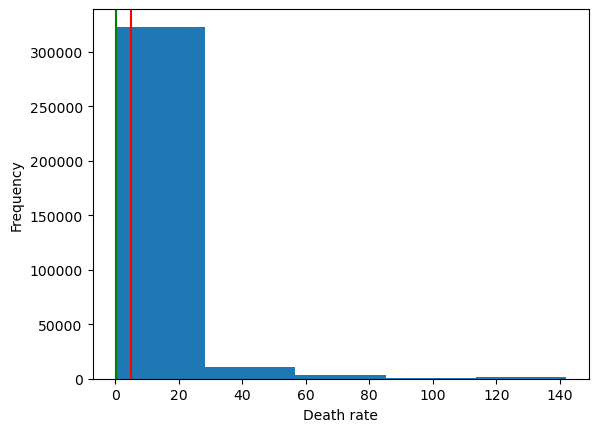

In [29]:
plt.hist(df_result['Death rate'].values, bins=5)  # check distribution of single set of data
plt.axvline(df_result['Death rate'].mean(),c='red',label='mean')
plt.axvline(df_result['Death rate'].median(),c='g',label='median')
plt.xlabel('Death rate')
plt.ylabel('Frequency')
plt.show()

<Figure size 640x480 with 0 Axes>

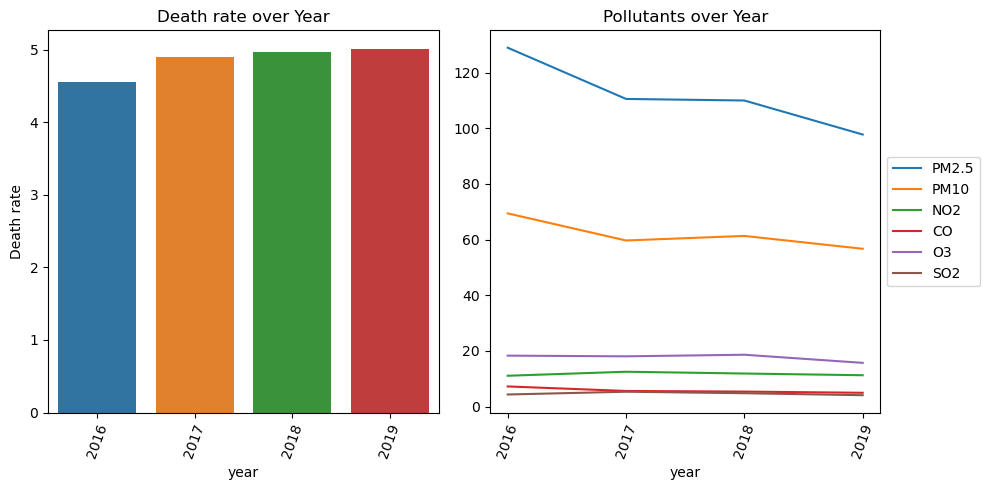

In [30]:
plt.figure()

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
g = df_result.groupby(['year'], as_index=False)['Death rate'].mean()
# .sort_values(by='asthmarate', ascending=False).head(10)
ax = sns.barplot(data=g, x='year', y='Death rate').set(title='Death rate over Year')
plt.xticks(rotation=70)

plt.subplot(1, 2, 2)
df_result.groupby(['year'])['pm25'].mean().plot(kind='line',label='PM2.5')
df_result.groupby(['year'])['pm10'].mean().plot(kind='line', label='PM10')
df_result.groupby(['year'])['no2'].mean().plot(kind='line', label='NO2')
df_result.groupby(['year'])['co'].mean().plot(kind='line', label='CO')
df_result.groupby(['year'])['o3'].mean().plot(kind='line', label='O3')
df_result.groupby(['year'])['so2'].mean().plot(kind='line', label='SO2')
df_result.groupby(['year'], as_index=False)['Death rate'].mean()
plt.legend(loc="upper right")
plt.title('Pollutants over Year')
plt.locator_params(axis="both", integer=True, tight=True)
plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

>**Finding**

1. The top two highest pollutants are PM2.5 and PM10, while other pollutants appear to be low.
2. The trend shows a decline from 2016 to 2019, but the death rate is increasing. This suggests that the impact of pollutants might have a delayed effect or that pollutants are only one of the factors contributing to the death rate.

Therefore, the project will focus on assessing the level of impact on health.

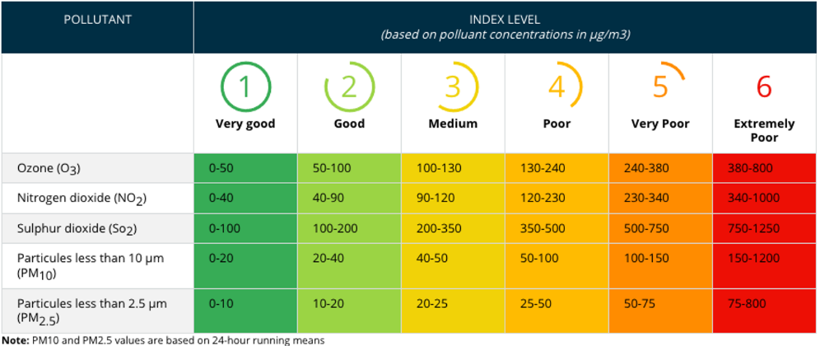

From above level will focus level 5, and 6.\
Unheathy value of PM2.5 > 50.\
Unheathy value of PM10 > 100.\
Unheathy value of NO2 > 230.\
Unheathy value of O3 > 240.\
Unheathy value of SO2 > 500.

Then, change to value of each pollutant (0 means healthy, 1 means unhealthy)

In [31]:
df_result['PM25_Poor'] = np.where(df_result['pm25'] > 50, 1, 0)
df_result['PM10_Poor'] = np.where(df_result['pm10'] > 100, 1, 0)
df_result['NO2_Poor'] = np.where(df_result['no2'] > 230, 1, 0)
df_result['SO2_Poor'] = np.where(df_result['so2'] > 500, 1, 0)
df_result['O3_Poor'] = np.where(df_result['o3'] > 240, 1, 0)
df_result['Unhealthy'] = np.where(df_result['PM25_Poor'] | df_result['PM10_Poor'] |
                                  df_result['NO2_Poor'] | df_result['SO2_Poor'] | df_result['O3_Poor'] ,1,0)
df_result.sample(10)

Cause Country_x    Deaths  \
35132   Cardiomyopathy, myocarditis, endocarditis     India  11783.72   
119176                            Oral conditions     India      0.00   
81087                    Colon and rectum cancers     India  77368.01   
188002                           Hookworm disease  Thailand      0.00   
19106          Idiopathic intellectual disability     India      0.00   
330685                             Osteoarthritis     China      0.00   
48328                              Osteoarthritis     India      0.00   
149970                                   Drowning  Thailand   3844.75   
337690         Idiopathic intellectual disability     China      0.00   
149792                          Parkinson disease  Thailand   3939.96   

        Death rate  year iso3       Date Country_y  aqi         co  ...  \
35132         0.88  2017  IND 2017-02-16     India  0.0  10.100000  ...   
119176        0.00  2019  IND 2019-12-13     India  0.0   7.322727  ...   
81087         5.65  2019  IND 2019-04-16     India  0.0   6.994444  ...   
188002        0.00  2018  THA 2018-01-06  Thailand  0.0   0.100000  ...   
19106         0.00  2016  IND 2016-01-07     India  0.0  11.800000  ...   
330685        0.00  2019  CHN 2019-04-04     China  0.0   6.942308  ...   
48328         0.00  2017  IND 2017-03-08     India  0.0   6.628571  ...   
149970        5.56  2017  THA 2017-02-07  Thailand  0.0   0.100000  ...   
337690        0.00  2019  CHN 2019-06-13     China  0.0   5.425490  ...   
149792        5.69  2017  THA 2017-02-12  Thailand  0.0   0.100000  ...   

               o3        pm10        pm25       so2  PM25_Poor  PM10_Poor  \
35132   18.930769   98.555556  175.466667  7.328571          1          0   
119176  11.381818   62.300000  122.260870  4.122727          1          0   
81087   15.827778   71.769231  113.157895  7.250000          1          0   
188002   9.500000   51.840000  115.800000  1.540000          1          0   
19106   11.525000  167.500000  245.300000  5.362500          1          1   
330685  30.048980   62.634615  110.769231  5.773077          1          0   
48328   13.100000   70.888889  135.866667  5.521429          1          0   
149970  12.020000   55.400000  117.200000  1.540000          1          0   
337690  37.804082   33.480769   65.750000  3.657692          1          0   
149792  18.100000   52.000000  105.400000  0.800000          1          0   

        NO2_Poor  SO2_Poor  O3_Poor  Unhealthy  
35132          0         0        0          1  
119176         0         0        0          1  
81087          0         0        0          1  
188002         0         0        0          1  
19106          0         0        0          1  
330685         0         0        0          1  
48328          0         0        0          1  
149970         0         0        0          1  
337690         0         0        0          1  
149792         0         0        0          1  

[10 rows x 21 columns]

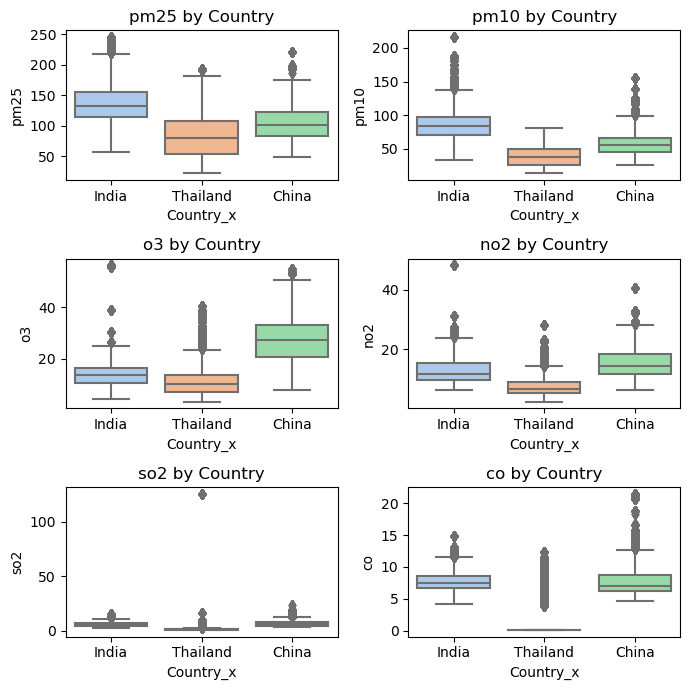

In [32]:
plt.subplots(3, 2 , figsize=(7,7))
col = ['pm25','pm10','o3','no2','so2','co']
for i in range(len(col)):
    plt.subplot(3, 2, i+1)

    sns.boxplot(x='Country_x',
                y=col[i],
                data=df_result,
                palette="pastel").set(title= col[i]+' by Country')

plt.tight_layout()
plt.show()


> **Observation**
There are many outliers showing in every polutants mean some part of those countried have different air quality.

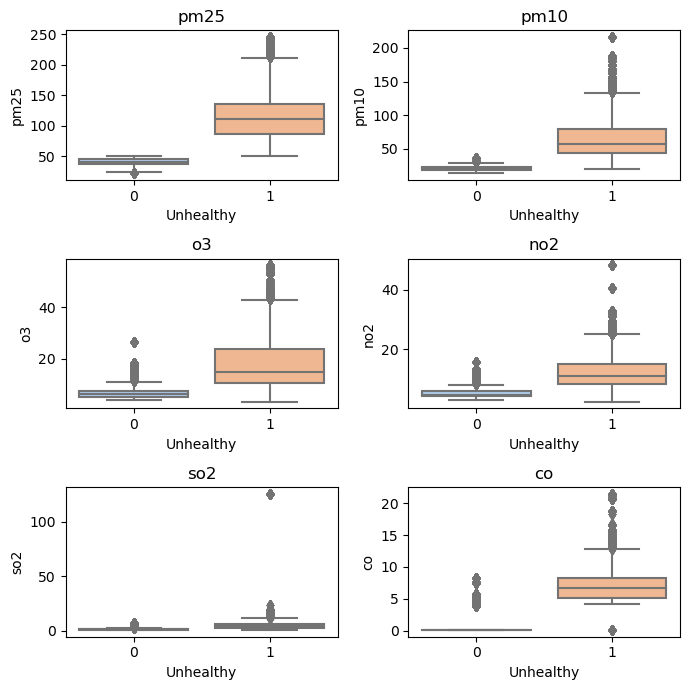

In [33]:
plt.subplots(3, 2 , figsize=(7,7))
col = ['pm25','pm10','o3','no2','so2','co']
for i in range(len(col)):
    plt.subplot(3, 2, i+1)

    sns.boxplot(x='Unhealthy',
                y=col[i],
                data=df_result,
                palette="pastel").set(title= col[i])

plt.tight_layout()
plt.show()

**Observation**

Boxplot shows many outliners in each pollutants.

---
## Step 2. Modelling
1. Linear Regression
2. Logistic Regression
3. KNN
4. Decision tree

> From this step using **Google Colab** to run (purpose for XGBoost using GPU).\
> Some cells need to rerun by jupyter because shows warning..... In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [34]:
# review data
df_result

Cause Country_x     Deaths  Death rate  year iso3  \
0       Ischaemic heart disease     India  1405038.0      106.44  2016  IND   
1       Ischaemic heart disease     India  1405038.0      106.44  2016  IND   
2       Ischaemic heart disease     India  1405038.0      106.44  2016  IND   
3       Ischaemic heart disease     India  1405038.0      106.44  2016  IND   
4       Ischaemic heart disease     India  1405038.0      106.44  2016  IND   
...                         ...       ...        ...         ...   ...  ...   
339704           Trichomoniasis     China        0.0        0.00  2019  CHN   
339705           Trichomoniasis     China        0.0        0.00  2019  CHN   
339706           Trichomoniasis     China        0.0        0.00  2019  CHN   
339707           Trichomoniasis     China        0.0        0.00  2019  CHN   
339708           Trichomoniasis     China        0.0        0.00  2019  CHN   

             Date Country_y     aqi         co  ...         o3        pm10  \
0      2016-01-01     India    0.00   4.350000  ...   4.625000  126.000000   
1      2016-01-02     India    0.00   7.925000  ...   8.866667  155.000000   
2      2016-01-03     India    0.00   7.985714  ...  13.666667  144.000000   
3      2016-01-04     India    0.00  10.244444  ...  11.066667  153.600000   
4      2016-01-05     India    0.00  11.466667  ...   8.944444  153.200000   
...           ...       ...     ...        ...  ...        ...         ...   
339704 2019-12-27     China   79.00   9.411538  ...  13.667391   60.923077   
339705 2019-12-28     China  155.50  10.651923  ...  14.602174   70.750000   
339706 2019-12-29     China  177.75  10.217308  ...  13.343478   69.980769   
339707 2019-12-30     China   59.75   8.355769  ...  12.545652   58.596154   
339708 2019-12-31     China   54.25   7.998039  ...  14.297778   52.980392   

              pm25       so2  PM25_Poor  PM10_Poor  NO2_Poor  SO2_Poor  \
0       164.666667  7.750000          1          1         0         0   
1       178.000000  8.750000          1          1         0         0   
2       209.777778  2.914286          1          1         0         0   
3       225.000000  5.733333          1          1         0         0   
4       230.000000  6.000000          1          1         0         0   
...            ...       ...        ...        ...       ...       ...   
339704  120.211539  6.790385          1          0         0         0   
339705  141.807692  7.992308          1          0         0         0   
339706  141.115385  7.061538          1          0         0         0   
339707  118.269231  5.625000          1          0         0         0   
339708  101.333333  6.176471          1          0         0         0   

        O3_Poor  Unhealthy  
0             0          1  
1             0          1  
2             0          1  
3             0          1  
4             0          1  
...         ...        ...  
339704        0          1  
339705        0          1  
339706        0          1  
339707        0          1  
339708        0          1  

[339709 rows x 21 columns]

In [35]:
# Drop non-numeric columns
X = df_result.drop(['iso3', 'Cause','Country_x','Country_y','Date'],axis=1)
y = df_result['Death rate'].copy()

In [36]:
X

Deaths  Death rate  year     aqi         co        no2         o3  \
0       1405038.0      106.44  2016    0.00   4.350000  14.600000   4.625000   
1       1405038.0      106.44  2016    0.00   7.925000   7.725000   8.866667   
2       1405038.0      106.44  2016    0.00   7.985714  11.442857  13.666667   
3       1405038.0      106.44  2016    0.00  10.244444  15.077778  11.066667   
4       1405038.0      106.44  2016    0.00  11.466667  15.000000   8.944444   
...           ...         ...   ...     ...        ...        ...        ...   
339704        0.0        0.00  2019   79.00   9.411538  19.921154  13.667391   
339705        0.0        0.00  2019  155.50  10.651923  24.498077  14.602174   
339706        0.0        0.00  2019  177.75  10.217308  24.100000  13.343478   
339707        0.0        0.00  2019   59.75   8.355769  18.388462  12.545652   
339708        0.0        0.00  2019   54.25   7.998039  16.076471  14.297778   

              pm10        pm25       so2  PM25_Poor  PM10_Poor  NO2_Poor  \
0       126.000000  164.666667  7.750000          1          1         0   
1       155.000000  178.000000  8.750000          1          1         0   
2       144.000000  209.777778  2.914286          1          1         0   
3       153.600000  225.000000  5.733333          1          1         0   
4       153.200000  230.000000  6.000000          1          1         0   
...            ...         ...       ...        ...        ...       ...   
339704   60.923077  120.211539  6.790385          1          0         0   
339705   70.750000  141.807692  7.992308          1          0         0   
339706   69.980769  141.115385  7.061538          1          0         0   
339707   58.596154  118.269231  5.625000          1          0         0   
339708   52.980392  101.333333  6.176471          1          0         0   

        SO2_Poor  O3_Poor  Unhealthy  
0              0        0          1  
1              0        0          1  
2              0        0          1  
3              0        0          1  
4              0        0          1  
...          ...      ...        ...  
339704         0        0          1  
339705         0        0          1  
339706         0        0          1  
339707         0        0          1  
339708         0        0          1  

[339709 rows x 16 columns]

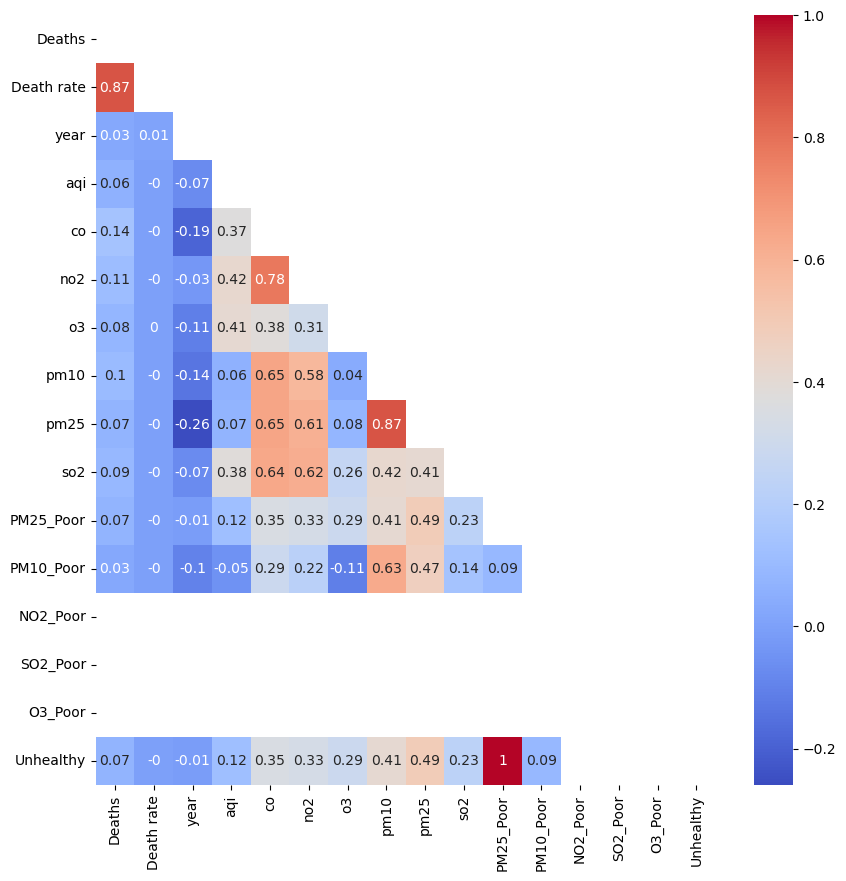

In [37]:
# Create heatmap show correlation of each columns.
correlation = X.corr()
mask = np.triu(correlation)
plt.figure(figsize=(10,10))
sns.heatmap(correlation.round(2), mask=mask, annot=True, cmap='coolwarm')
plt.show()

> **Finding**
From the heatmap and results, only numeric columns
Correlations between PM10, PM2.5, CO and NO2 are strong positive.

In [38]:
df_result_m = pd.get_dummies(df_result,columns=['Country_x'], dtype=int)
df_result_m

Cause     Deaths  Death rate  year iso3       Date  \
0       Ischaemic heart disease  1405038.0      106.44  2016  IND 2016-01-01   
1       Ischaemic heart disease  1405038.0      106.44  2016  IND 2016-01-02   
2       Ischaemic heart disease  1405038.0      106.44  2016  IND 2016-01-03   
3       Ischaemic heart disease  1405038.0      106.44  2016  IND 2016-01-04   
4       Ischaemic heart disease  1405038.0      106.44  2016  IND 2016-01-05   
...                         ...        ...         ...   ...  ...        ...   
339704           Trichomoniasis        0.0        0.00  2019  CHN 2019-12-27   
339705           Trichomoniasis        0.0        0.00  2019  CHN 2019-12-28   
339706           Trichomoniasis        0.0        0.00  2019  CHN 2019-12-29   
339707           Trichomoniasis        0.0        0.00  2019  CHN 2019-12-30   
339708           Trichomoniasis        0.0        0.00  2019  CHN 2019-12-31   

       Country_y     aqi         co        no2  ...       so2  PM25_Poor  \
0          India    0.00   4.350000  14.600000  ...  7.750000          1   
1          India    0.00   7.925000   7.725000  ...  8.750000          1   
2          India    0.00   7.985714  11.442857  ...  2.914286          1   
3          India    0.00  10.244444  15.077778  ...  5.733333          1   
4          India    0.00  11.466667  15.000000  ...  6.000000          1   
...          ...     ...        ...        ...  ...       ...        ...   
339704     China   79.00   9.411538  19.921154  ...  6.790385          1   
339705     China  155.50  10.651923  24.498077  ...  7.992308          1   
339706     China  177.75  10.217308  24.100000  ...  7.061538          1   
339707     China   59.75   8.355769  18.388462  ...  5.625000          1   
339708     China   54.25   7.998039  16.076471  ...  6.176471          1   

        PM10_Poor  NO2_Poor  SO2_Poor  O3_Poor  Unhealthy  Country_x_China  \
0               1         0         0        0          1                0   
1               1         0         0        0          1                0   
2               1         0         0        0          1                0   
3               1         0         0        0          1                0   
4               1         0         0        0          1                0   
...           ...       ...       ...      ...        ...              ...   
339704          0         0         0        0          1                1   
339705          0         0         0        0          1                1   
339706          0         0         0        0          1                1   
339707          0         0         0        0          1                1   
339708          0         0         0        0          1                1   

        Country_x_India  Country_x_Thailand  
0                     1                   0  
1                     1                   0  
2                     1                   0  
3                     1                   0  
4                     1                   0  
...                 ...                 ...  
339704                0                   0  
339705                0                   0  
339706                0                   0  
339707                0                   0  
339708                0                   0  

[339709 rows x 23 columns]

In [39]:
df_result_m = df_result.drop(['iso3', 'Cause','Country_x','Country_y','Date'],axis=1)

In [40]:
df_result_m.sample(10)

Deaths  Death rate  year  aqi         co        no2         o3  \
330795      0.00        0.00  2019  0.0   9.842308  26.142308  14.618367   
55222   32594.33        2.41  2018  0.0   9.285714  20.385714  12.685714   
142948      0.00        0.00  2016  0.0   7.400000  10.600000  28.380000   
88785   23264.99        1.70  2019  0.0   8.311111  13.094118  19.711111   
164568      0.00        0.00  2017  0.0   0.100000   5.250000   6.883333   
161819      0.00        0.00  2017  0.0   0.100000   3.883333   6.750000   
249693  37750.88        2.64  2017  0.0   8.150000  16.819231  24.408163   
39325    1597.35        0.12  2017  0.0  10.721429  22.750000  13.838462   
48752       0.00        0.00  2017  0.0   6.923077  12.491667  20.269231   
330487      0.00        0.00  2019  0.0   5.375000  10.334615  26.069388   

             pm10        pm25       so2  PM25_Poor  PM10_Poor  NO2_Poor  \
330795  72.288462  140.865385  9.392308          1          0         0   
55222   93.888889  184.437500  8.507143          1          0         0   
142948  49.600000  153.000000  3.180000          1          0         0   
88785   82.285714  115.666667  9.088889          1          0         0   
164568  19.366667   40.416667  0.850000          0          0         0   
161819  17.000000   36.816667  1.200000          0          0         0   
249693  51.288462   96.865385  8.515385          1          0         0   
39325   89.250000  169.200000  8.064286          1          0         0   
48752   82.222222  135.857143  5.061538          1          0         0   
330487  52.538462   86.096154  3.880769          1          0         0   

        SO2_Poor  O3_Poor  Unhealthy  
330795         0        0          1  
55222          0        0          1  
142948         0        0          1  
88785          0        0          1  
164568         0        0          0  
161819         0        0          0  
249693         0        0          1  
39325          0        0          1  
48752          0        0          1  
330487         0        0          1

## Linear regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [45]:
X = df_result_m[['co','no2','o3','pm10','pm25','so2']]

y = df_result_m['Unhealthy']

In [46]:
X

co        no2         o3        pm10        pm25       so2
0        4.350000  14.600000   4.625000  126.000000  164.666667  7.750000
1        7.925000   7.725000   8.866667  155.000000  178.000000  8.750000
2        7.985714  11.442857  13.666667  144.000000  209.777778  2.914286
3       10.244444  15.077778  11.066667  153.600000  225.000000  5.733333
4       11.466667  15.000000   8.944444  153.200000  230.000000  6.000000
...           ...        ...        ...         ...         ...       ...
339704   9.411538  19.921154  13.667391   60.923077  120.211539  6.790385
339705  10.651923  24.498077  14.602174   70.750000  141.807692  7.992308
339706  10.217308  24.100000  13.343478   69.980769  141.115385  7.061538
339707   8.355769  18.388462  12.545652   58.596154  118.269231  5.625000
339708   7.998039  16.076471  14.297778   52.980392  101.333333  6.176471

[339709 rows x 6 columns]

In [25]:
df_result_m.groupby(df_result_m['Unhealthy'])['Unhealthy'].count()

Unhealthy
0     26593
1    313116
Name: Unhealthy, dtype: int64

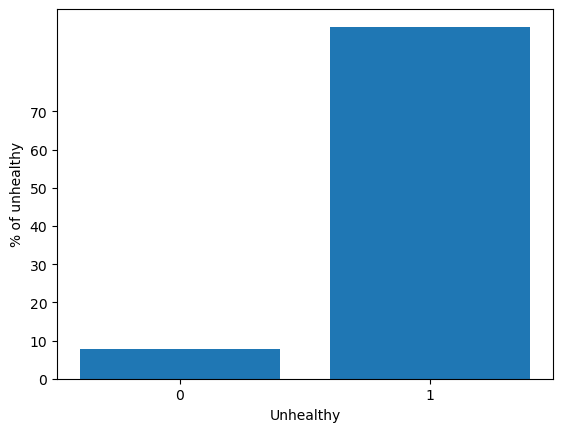

Class imbalance: [0.08 0.92]


In [26]:
values, counts = np.unique(df_result_m['Unhealthy'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Unhealthy')
plt.ylabel('% of unhealthy')
plt.yticks(np.arange(0, 80, step=10))

plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

> **Finding** Most of result are unhealthy from the selected country!
Note: I try to change to calculation of unhealty to consider more than 1 pollutants became Heathty:Unhealty = 9:1 which is not true.

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [28]:
# 1. Instantiate the model
linear_regression_model = LinearRegression()

# 2. Fit the model
linear_regression_model.fit(X_train, y_train)
# credit_logit.fit(X_train, y_train);
#The intercept
intercept = linear_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = linear_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: 0.4293361380601636
Coefficients: -0.007272762223541773


In [29]:
# Step 3 prediction
model_prediction = linear_regression_model.predict(X_test)

In [30]:
# Evaluate the model
print(f'The R2 score: {r2_score(y_test, model_prediction)}')

The R2 score: 0.31918582745115187


In [31]:
# 3. Score model
print(f'Score on train: {linear_regression_model.score(X_train, y_train)}')
print(f'Score on test: {linear_regression_model.score(X_test, y_test)}')

Score on train: 0.31330181486027897
Score on test: 0.31918582745115187


>**Finding**  R^2 score is 0.31 consider low and score on train and test also low. And this is categorical so it is not proper to use linear regression.

### Logistic Regression

For the rest of models will add some noise and using Standard Scaler.

In [51]:
X = df_result_m[['co','no2','o3','pm10','pm25','so2','NO2_Poor','O3_Poor','PM10_Poor','PM25_Poor','SO2_Poor']]
y = df_result_m['Unhealthy']

In [52]:
X

co        no2         o3        pm10        pm25       so2  \
0        4.350000  14.600000   4.625000  126.000000  164.666667  7.750000   
1        7.925000   7.725000   8.866667  155.000000  178.000000  8.750000   
2        7.985714  11.442857  13.666667  144.000000  209.777778  2.914286   
3       10.244444  15.077778  11.066667  153.600000  225.000000  5.733333   
4       11.466667  15.000000   8.944444  153.200000  230.000000  6.000000   
...           ...        ...        ...         ...         ...       ...   
339704   9.411538  19.921154  13.667391   60.923077  120.211539  6.790385   
339705  10.651923  24.498077  14.602174   70.750000  141.807692  7.992308   
339706  10.217308  24.100000  13.343478   69.980769  141.115385  7.061538   
339707   8.355769  18.388462  12.545652   58.596154  118.269231  5.625000   
339708   7.998039  16.076471  14.297778   52.980392  101.333333  6.176471   

        NO2_Poor  O3_Poor  PM10_Poor  PM25_Poor  SO2_Poor  
0              0        0          1          1         0  
1              0        0          1          1         0  
2              0        0          1          1         0  
3              0        0          1          1         0  
4              0        0          1          1         0  
...          ...      ...        ...        ...       ...  
339704         0        0          0          1         0  
339705         0        0          0          1         0  
339706         0        0          0          1         0  
339707         0        0          0          1         0  
339708         0        0          0          1         0  

[339709 rows x 11 columns]

In [53]:
# Add some noise to the data to make it harder to classify
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features) * 10)

# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=25)

#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# 1. Instantiate the model
logit_regression_model = LogisticRegression()

# 2. Fit the model
logit_regression_model.fit(X_train, y_train)
# logit_regression_model.fit(X, y)


LogisticRegression()

In [55]:
X

co        no2         o3        pm10        pm25        so2  \
0       17.665865  21.752790 -10.829003  125.916162  170.880026   0.549144   
1       19.955374  -1.925657  19.149407  157.286301  182.451376  -2.616022   
2       10.646416  35.292530  24.903579  160.726222  210.769270  16.894249   
3        5.483024  28.162509  13.016799  157.602100  221.623677  18.298056   
4        3.420755  12.873024   5.553042  156.321699  235.651527   4.525797   
...           ...        ...        ...         ...         ...        ...   
339704  15.702046  23.797203  15.341539   75.966233  118.362685  -1.324604   
339705   4.768925  45.091539  13.581738   67.398915  135.984754   6.302686   
339706  23.112949  21.342767   6.510491   93.831110  164.655125 -15.634145   
339707  15.258137  20.493492  18.453746   68.269342  112.313826   6.597709   
339708  14.157262   3.624947  -1.108434   47.690375   95.604374   3.256324   

         NO2_Poor    O3_Poor  PM10_Poor  PM25_Poor   SO2_Poor  
0        2.655116   1.085485   1.042914  -0.746002   4.330262  
1        1.351369  14.845370  -9.798049 -18.777283 -17.433723  
2       -2.712480   6.132042  -1.673172  -4.493090   1.327083  
3       -7.319695   6.602316  -2.508719  -8.394334  -4.893372  
4       -0.259053   2.890942  -4.398791   8.081600   8.422247  
...           ...        ...        ...        ...        ...  
339704  -4.867836  -2.022878  10.371531  17.243692 -21.383984  
339705 -14.147952  -0.910566  -3.842508   9.830755   6.638024  
339706 -10.520022   5.049220  -2.945834  -8.820212 -13.476812  
339707  13.312483   7.809351 -19.380331  -0.410640 -20.203263  
339708  11.861007  -5.711312  -5.396535  -0.274334   5.491273  

[339709 rows x 11 columns]

In [56]:
# Step 3 prediction
model_prediction = logit_regression_model.predict(X_test)
# Evaluate the model
r2 = r2_score(y_test, model_prediction)
print(f'The R2 score: {r2}')

train_pred = logit_regression_model.predict(X_train)
r2_train = r2_score(y_train , train_pred)
print(f'The R2 score: {r2_train}')

The R2 score: 0.6069746361062199
The R2 score: 0.6098098981654628


In [57]:
# 3. Score model
print(f'Score on train: {logit_regression_model.score(X_train, y_train)}')
print(f'Score on test: {logit_regression_model.score(X_test, y_test)}')

Score on train: 0.971912900132887
Score on test: 0.9714854827156496


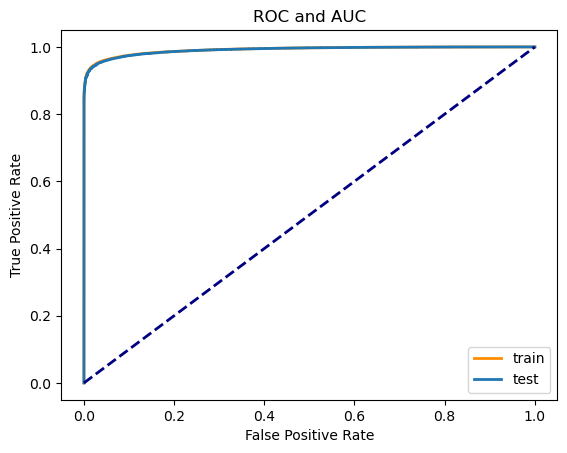

Test AUC score: 0.9909383514835
Train AUC score: 0.991293928430851


In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
y_proba = logit_regression_model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = logit_regression_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

> **Finding** AUC of train and test set are around 97% which is very high (good), let's check the confusion metrix.

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, model_prediction)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Positive review", "Predicted Negative review"],
    index=["True Positive review", "True Negtive review"]
)

display(cf_df)


Predicted Positive review  Predicted Negative review
True Positive review                       6385                       1641
True Negtive review                        1265                      92622

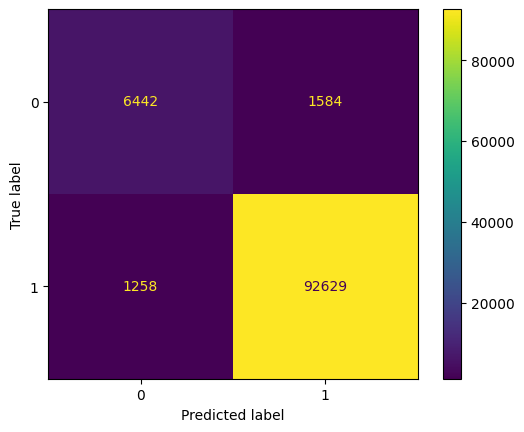

In [264]:
ConfusionMatrixDisplay.from_estimator(logit_regression_model, X_test, y_test)

> **Finding**  True positive and True negative are high align with the AUC score.


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Get class predictions
y_pred = logit_regression_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

In [61]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      8026
           1       0.98      0.99      0.98     93887

    accuracy                           0.97    101913
   macro avg       0.91      0.89      0.90    101913
weighted avg       0.97      0.97      0.97    101913



In [62]:

# Calculation of Mean Squared Error (MSE) , RMSE, MAE  -- 0 is perfect fit
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
mae =  mean_absolute_error(y_test,y_pred,  multioutput='raw_values')
test_accuracy = accuracy_score(y_pred, y_test)
print('MSE test : ', mean_squared_error(y_test,y_pred) )
print('RMSE test : ', mean_squared_error(y_test,y_pred, squared=False) )
print('MAE test : ', mean_absolute_error(y_test,y_pred,  multioutput='raw_values'))

MSE test :  0.028514517284350376
RMSE test :  0.16886242117283046
MAE test :  [0.02851452]


In [63]:
data = {'Model': ['Logistic Regression'],
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : mse,
        'RMSE' : rmse,
        'Accuracy' : test_accuracy}
model_df =  pd.DataFrame(data)
model_df

Model        R2       MAE       MSE      RMSE  Accuracy
0  Logistic Regression  0.606975  0.028515  0.028515  0.168862  0.971485

## Principal Component Analysis

Checking distribution data and try to transform

In [64]:
from sklearn.decomposition import PCA
# Lets say we want to keep 90% of the variance
my_PCA = PCA(n_components = 0.9)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [65]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (237796, 11)
PCA Transformed: (237796, 9)


In [66]:
# Let's use all the default parameters for now
my_logreg = LogisticRegression()

# Fitting to original data
my_logreg.fit(X_train,y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_train, y_train)}')
print(f'Test Score: {my_logreg.score(X_test, y_test)}')


Train Score: 0.971912900132887
Test Score: 0.9714854827156496


In [67]:

my_logreg_PCA = LogisticRegression()

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score - PCA: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score - PCA: {my_logreg_PCA.score(X_test_PCA, y_test)}')

# reduce PCs from 11 to 9

Train Score - PCA: 0.950175780921462
Test Score - PCA: 0.9499671288255669


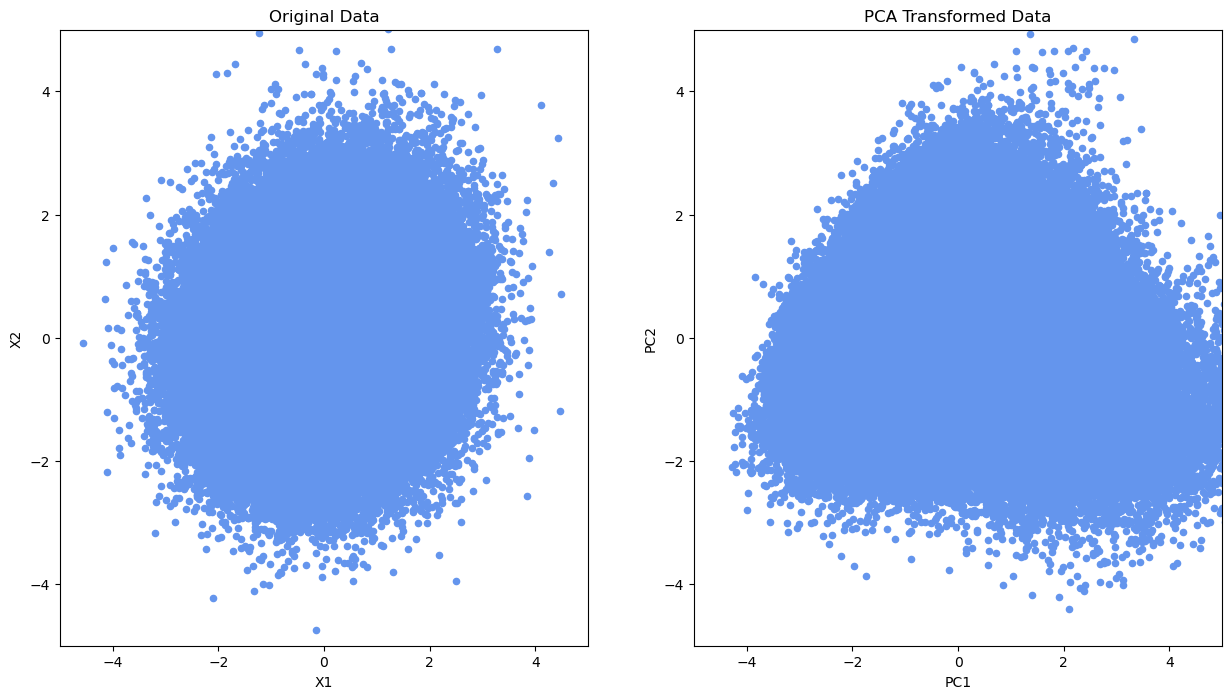

In [68]:
plt.subplots(1,2,figsize=(15,8))

plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c='cornflowerblue', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(1,2,2)
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c='cornflowerblue', s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data')
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.show()


> **Finding**
> The dataset is less features, only 6, after transform PCA reduce to 5 and the shape is not much changed. So, let's keep the original dataset for modelling.

**But** all the poor indicators are came from pollutants let cut them off.
**Backward Optimization**

In [69]:
X = df_result_m[['co','no2','o3','pm10','pm25','so2']]
y = df_result_m['Unhealthy']

In [70]:
X

co        no2         o3        pm10        pm25       so2
0        4.350000  14.600000   4.625000  126.000000  164.666667  7.750000
1        7.925000   7.725000   8.866667  155.000000  178.000000  8.750000
2        7.985714  11.442857  13.666667  144.000000  209.777778  2.914286
3       10.244444  15.077778  11.066667  153.600000  225.000000  5.733333
4       11.466667  15.000000   8.944444  153.200000  230.000000  6.000000
...           ...        ...        ...         ...         ...       ...
339704   9.411538  19.921154  13.667391   60.923077  120.211539  6.790385
339705  10.651923  24.498077  14.602174   70.750000  141.807692  7.992308
339706  10.217308  24.100000  13.343478   69.980769  141.115385  7.061538
339707   8.355769  18.388462  12.545652   58.596154  118.269231  5.625000
339708   7.998039  16.076471  14.297778   52.980392  101.333333  6.176471

[339709 rows x 6 columns]

In [71]:
# Add some noise to the data to make it harder to classify
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features) * 10)

# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=25)

#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# 1. Instantiate the model
logit_regression_model = LogisticRegression()

# 2. Fit the model
logit_regression_model.fit(X_train, y_train)
# logit_regression_model.fit(X, y)


LogisticRegression()

In [73]:
X

co        no2         o3        pm10        pm25        so2
0       17.665865  21.752790 -10.829003  125.916162  170.880026   0.549144
1       10.580116   8.810485   8.909581  153.253998  182.330262  20.780374
2       -1.664942  21.725598  15.952968  148.451376  198.411756   4.265654
3       25.089814   4.279729  -8.710616  136.166277  227.660702  29.583007
4       22.703579  31.726222   9.935937  167.179964  227.287520  12.132042
...           ...        ...        ...         ...         ...        ...
339704   4.304018  13.123428  25.991489   62.011784  111.830756  22.421232
339705  12.143972  47.682202  11.059280   48.246802  147.410791   2.078286
339706  11.392125  49.529976  11.048615   70.160039  149.131576  -0.431174
339707   9.165370  26.486888  16.901841   60.960000  116.856433  11.724297
339708  17.358088  -1.815956  14.860779   62.166828  102.174858  -6.225500

[339709 rows x 6 columns]

In [74]:
# Step 3 prediction
model_prediction = logit_regression_model.predict(X_test)
# Evaluate the model
r2 = r2_score(y_test, model_prediction)
print(f'The R2 score: {r2}')

train_pred = logit_regression_model.predict(X_train)
r2_train = r2_score(y_train , train_pred)
print(f'The R2 score: {r2_train}')

The R2 score: 0.6156303908512997
The R2 score: 0.6133735448508808


In [75]:
# 3. Score model
print(f'Score on train: {logit_regression_model.score(X_train, y_train)}')
print(f'Score on test: {logit_regression_model.score(X_test, y_test)}')

Score on train: 0.972169422530236
Score on test: 0.9721134693316849


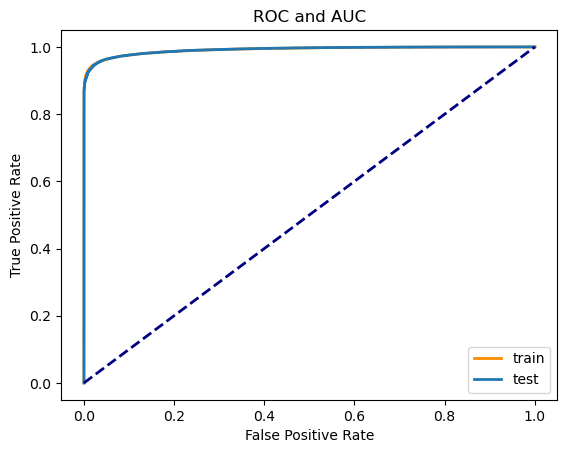

Test AUC score: 0.9914707844854485
Train AUC score: 0.9914433717994089


In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
y_proba = logit_regression_model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = logit_regression_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

> **Finding** AUC of train and test set are around 97% which is very high (good), let's check the confusion metrix.

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, model_prediction)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Positive review", "Predicted Negative review"],
    index=["True Positive review", "True Negtive review"]
)

display(cf_df)


Predicted Positive review  Predicted Negative review
True Positive review                       6442                       1584
True Negtive review                        1258                      92629

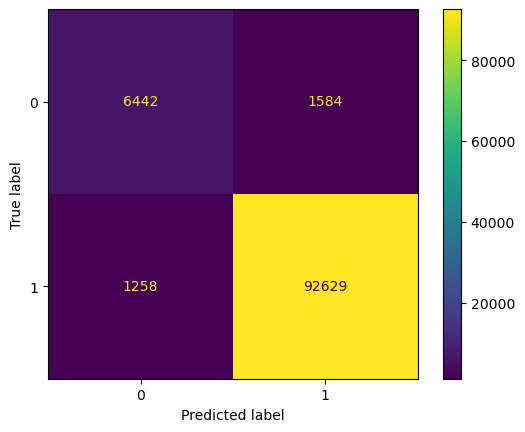

In [78]:
ConfusionMatrixDisplay.from_estimator(logit_regression_model, X_test, y_test)

> **Finding**  True positive and True negative are high align with the AUC score. And same data as the 11 hyperparameters.


In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Get class predictions
y_pred = logit_regression_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

In [80]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8026
           1       0.98      0.99      0.98     93887

    accuracy                           0.97    101913
   macro avg       0.91      0.89      0.90    101913
weighted avg       0.97      0.97      0.97    101913



In [81]:

# Calculation of Mean Squared Error (MSE) , RMSE, MAE  -- 0 is perfect fit
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
mae =  mean_absolute_error(y_test,y_pred,  multioutput='raw_values')
test_accuracy = accuracy_score(y_pred, y_test)
print('MSE test : ', mean_squared_error(y_test,y_pred) )
print('RMSE test : ', mean_squared_error(y_test,y_pred, squared=False) )
print('MAE test : ', mean_absolute_error(y_test,y_pred,  multioutput='raw_values'))

MSE test :  0.027886530668315132
RMSE test :  0.16699260662770413
MAE test :  [0.02788653]


In [82]:
data = {'Model': ['Logistic Regression'],
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : mse,
        'RMSE' : rmse,
        'Accuracy' : test_accuracy}
model_df =  pd.DataFrame(data)
model_df

Model       R2       MAE       MSE      RMSE  Accuracy
0  Logistic Regression  0.61563  0.027887  0.027887  0.166993  0.972113

## Principal Component Analysis

Checking distribution data and try to transform

In [83]:
from sklearn.decomposition import PCA
# Lets say we want to keep 90% of the variance
my_PCA = PCA(n_components = 0.9)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [84]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (237796, 6)
PCA Transformed: (237796, 5)


In [85]:
# Let's use all the default parameters for now
my_logreg = LogisticRegression()

# Fitting to original data
my_logreg.fit(X_train,y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_train, y_train)}')
print(f'Test Score: {my_logreg.score(X_test, y_test)}')


Train Score: 0.972169422530236
Test Score: 0.9721134693316849


In [86]:

my_logreg_PCA = LogisticRegression()

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score - PCA: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score - PCA: {my_logreg_PCA.score(X_test_PCA, y_test)}')

# reduce PCs from 6 to 5

Train Score - PCA: 0.9668791737455634
Test Score - PCA: 0.9677077507285626


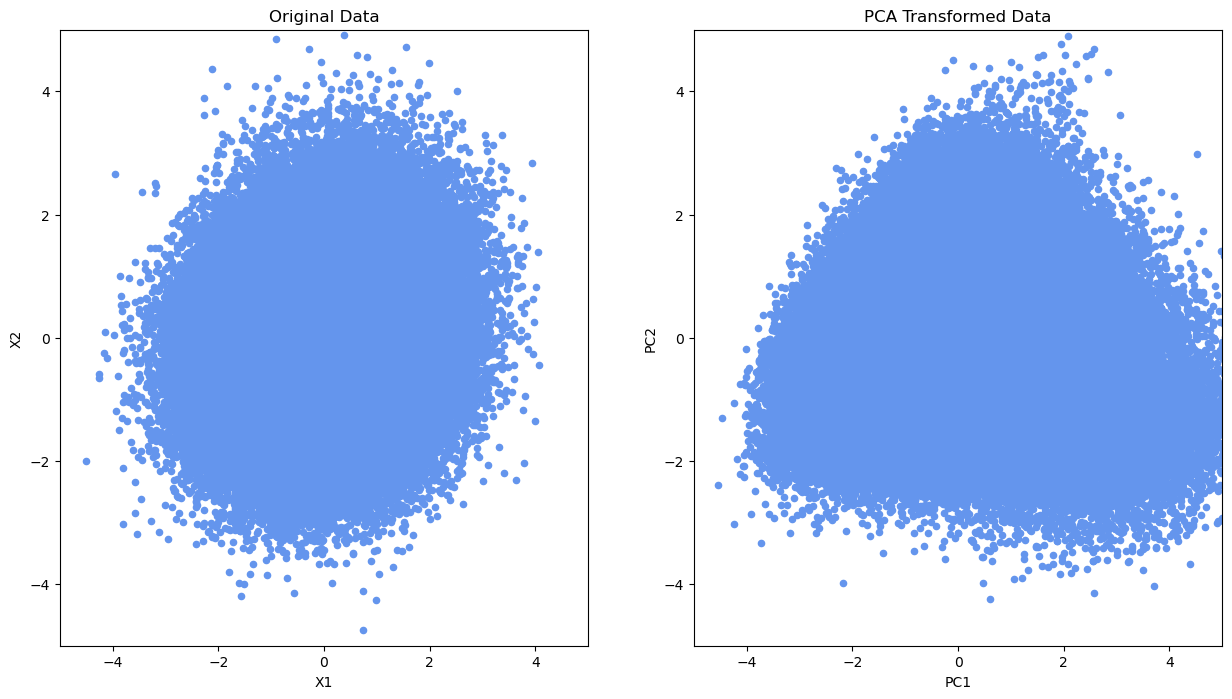

In [87]:
plt.subplots(1,2,figsize=(15,8))

plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c='cornflowerblue', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(1,2,2)
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c='cornflowerblue', s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data')
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.show()


> **Finding**
> The dataset is less features, only 6, after transform PCA reduce to 5 and the shape is not much changed. So, let's keep the original dataset for modelling.

>**Summary Logistic regression**
>- After reduce hyperparameters from 11 to 6 all scores are improve.
>- An R^2 value of 0.61 indicates a quite high correlation.
>- The mean absolute error (MAE) of 0.02, which is close to 0, means the error is low. Both the mean square error (MSE) and the root mean square error (RMSE) are also low.
>- The accuracy is very high at 97%.

## K-Nearest Neighbors (KNN)
Using same X, y

In [43]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [39]:
# Fit the model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train);
# Score the model on the test set
test_predictions = KNN_model.predict(X_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print(f"Test set accuracy: {test_accuracy}")
print('\nThe number of neighbors used to predict the target : ',KNN_model.n_neighbors)

Test set accuracy: 0.9677175630194381

The number of neighbors used to predict the target :  5


In [44]:
# Get class predictions
y_pred = KNN_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      8026
           1       0.98      0.98      0.98     93887

    accuracy                           0.97    101913
   macro avg       0.89      0.88      0.89    101913
weighted avg       0.97      0.97      0.97    101913



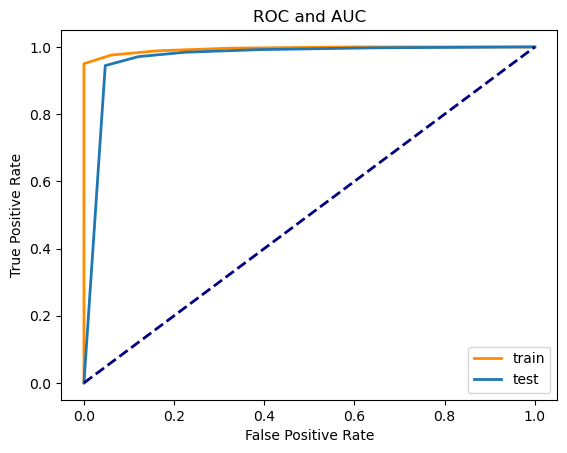

Test AUC score: 0.9658555248341588
Train AUC score: 0.9941734392809669


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = KNN_model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = KNN_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

> **Finding** AUC test set is 96% means good score, correct prediction is very high

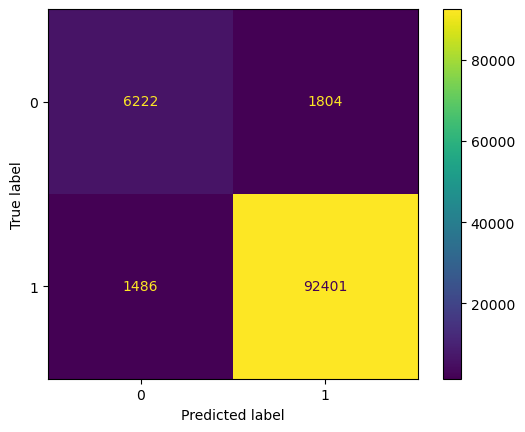

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

> **Finding** Confusion Metrix shows high True Positive and False Positive align to accuracy.

## Tuning KNN model

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 10)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [48]:
gridsearch.best_params_

{'n_neighbors': 9}

In [281]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse =  mean_squared_error(y_train,train_preds_grid, squared=False)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = mean_squared_error(y_test,test_preds_grid, squared=False)

print('train_rmse :', train_rmse)
print('test_rmse :', test_rmse)


train_rmse : 0.13503568346479022
test_rmse : 0.15032372177676817


In [282]:


# Calculation of Mean Squared Error (MSE) , RMSE, MAE  -- 0 is perfect fit
print('MSE test : ', mean_squared_error(y_test,y_pred) )
print('RMSE test : ', mean_squared_error(y_test,y_pred, squared=False) )
print('MAE test : ', mean_absolute_error(y_test,y_pred,  multioutput='raw_values'))

MSE test :  0.03228243698056185
RMSE test :  0.17967313928509696
MAE test :  [0.03228244]


In [283]:
r2 = r2_score(y_test, test_preds_grid)
mae =  mean_absolute_error(y_test,test_preds_grid,  multioutput='raw_values')
test_accuracy = accuracy_score(test_preds_grid.round(),y_test)
data = {'Model': 'KNN',
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : test_mse,
        'RMSE' : test_rmse,
        'Accuracy' : test_accuracy}
model_df = model_df._append(data, ignore_index = True)
model_df

Model        R2                    MAE       MSE      RMSE  \
0  Logistic Regression  0.615630               0.027887  0.027887  0.166993   
1                  KNN  0.688535  [0.04396015337700893]  0.022597  0.150324   

   Accuracy  
0  0.972113  
1  0.969189

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [285]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(X_train, y_train)

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

DT training set accuracy: 0.9713031337785328
The TEST classification accuracy is:  0.97051406591897


In [286]:
# Get class predictions
y_pred = DT_model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

report_initial = classification_report(y_test, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8026
           1       0.99      0.98      0.98     93887

    accuracy                           0.97    101913
   macro avg       0.89      0.92      0.90    101913
weighted avg       0.97      0.97      0.97    101913



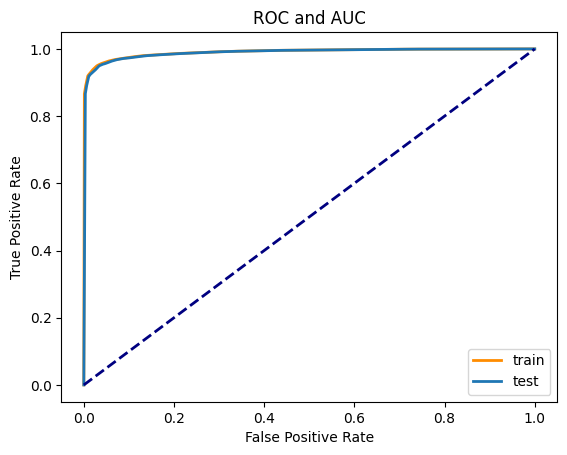

Test AUC score: 0.988568821051565
Train AUC score: 0.9901041273199599


In [287]:
y_proba = DT_model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = DT_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

In [288]:
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = mean_squared_error(y_test,y_pred, squared=False)
# mae =  mean_absolute_error(y_test,y_pred,  multioutput='raw_values')
print('R2 test : ',r2_score(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test,y_pred) )
print('RMSE test : ', mean_squared_error(y_test,y_pred, squared=False) )
print('MAE test : ', mean_absolute_error(y_test,y_pred,  multioutput='raw_values'))



R2 test :  0.5935852654849245
MSE test :  0.029485934081029896
RMSE test :  0.17171468801774034
MAE test :  [0.02948593]


In [289]:
DT_model.max_depth

5

### Tunning Decision tree
Find best parameters

In [50]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV


tree_para = {'criterion':['gini','entropy'],'max_depth': [6,7,8,9,10]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10]})

In [51]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [292]:
train_preds_grid = grid_tree.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse =  mean_squared_error(y_train,train_preds_grid, squared=False)
test_preds_grid = grid_tree.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = mean_squared_error(y_test,test_preds_grid, squared=False)

print('train_rmse :', train_rmse)
print('test_rmse :', test_rmse)


train_rmse : 0.16405433641215203
test_rmse : 0.1704241209208078


In [293]:
r2 = r2_score(y_test, test_preds_grid)
mae =  mean_absolute_error(y_test,test_preds_grid,  multioutput='raw_values')
test_accuracy = accuracy_score(test_preds_grid.round(),y_test)
data = {'Model': 'Decision Tree' ,
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : test_mse,
        'RMSE' : test_rmse,
        'Accuracy' : test_accuracy}
model_df = model_df._append(data, ignore_index = True)

model_df

Model        R2                     MAE       MSE      RMSE  \
0  Logistic Regression  0.615630                0.027887  0.027887  0.166993   
1                  KNN  0.688535   [0.04396015337700893]  0.022597  0.150324   
2        Decision Tree  0.599671  [0.029044380991630116]  0.029044  0.170424   

   Accuracy  
0  0.972113  
1  0.969189  
2  0.970956

In [294]:
import xgboost as xgb



In [295]:
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred,  multioutput='raw_values')
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
print('R2 test : ',r2)
print('MSE test : ', mae )
print('RMSE test : ', rmse )
print('MAE test : ', mae)


R2 test :  0.7165992061527791
MSE test :  [0.03889164]
RMSE test :  0.14339144917567861
MAE test :  [0.03889164]


In [296]:
test_accuracy = accuracy_score(y_pred.round(),y_test)
data = {'Model': 'XGBoost' ,
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : mse,
        'RMSE' : rmse,
        'Accuracy' : test_accuracy}
model_df = model_df._append(data, ignore_index = True)

model_df

Model        R2                     MAE       MSE      RMSE  \
0  Logistic Regression  0.615630                0.027887  0.027887  0.166993   
1                  KNN  0.688535   [0.04396015337700893]  0.022597  0.150324   
2        Decision Tree  0.599671  [0.029044380991630116]  0.029044  0.170424   
3              XGBoost  0.716599   [0.03889163992459305]  0.020561  0.143391   

   Accuracy  
0  0.972113  
1  0.969189  
2  0.970956  
3  0.970691

### Summary all 4 models
Compare R2, MSE, RMSE, Accuracy

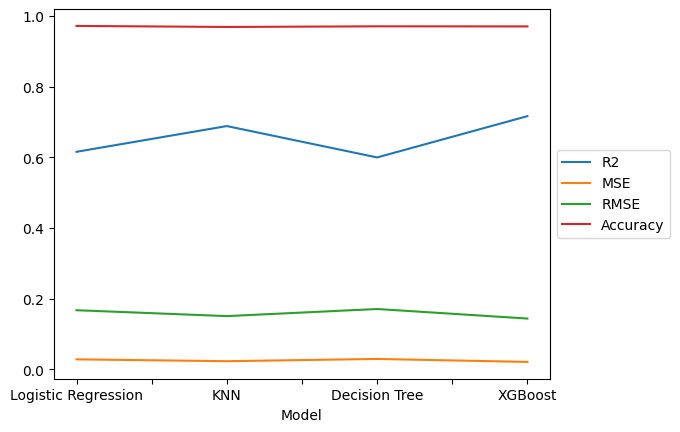

In [297]:
model_df.plot(kind='line',x='Model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

---
## Conclusion:

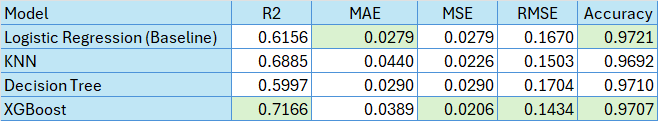

🏅Selected Model is XGBoost:\
Reasons:
- A good score of R2 should be close to 1
- MAE and MSE should close to 0
- RMSE, the lower is better
- The above table shows that each model’s results are almost the same but the **XGBoost** is the best from those 4 models.!


## Key Takeaway from the project

- Since the impact of the air quality index (AQI) on mortality takes time to become evident. So, find the relationship between them or diseases such as asthma and pollutant density and improve the model to predict diseases or mortality. 
- Add more datasets that contain many pollutants (O3, PM2.5, PM10, CO2, NO2, CO, SO2) or add more countries. Issue of this version some countries did not provide all pollutants.
- Develop an application to predict the unhealthy indicator.
- Try the time series model and change the split Train/Test to a year instead of random. (Suggest by Sailesh)

